### To predict insurance costs by using Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Here target is the charges

In [4]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [4]:
data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### As the count of children is varying , it is affecting the target ,hence this feature is considered

In [5]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

### As the non-smokers are more than the smokers, it is also affecting the target,hence this feature is considered

In [6]:
data.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

### As the region values are almost similar, this feature is not considered

In [54]:
data.age.value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

### The no. of people at the age of 18 is more than the people at 64 and the age is proportional to the medical cost, hence age is considered

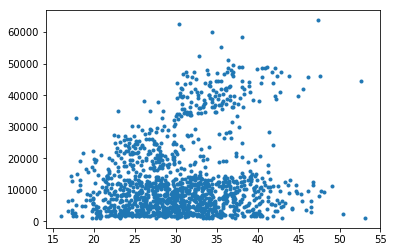

In [46]:
plt.plot(data['bmi'],data['charges'],'.')

### When 'bmi' is visuallized wrt to the 'charges' ,it is linearly distributed ,hence this feature is also considered

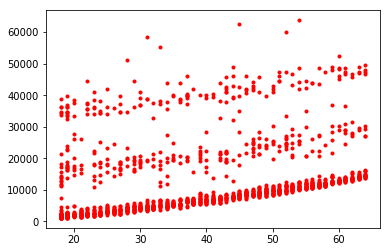

In [49]:
plt.plot(data['age'],data['charges'],'r.')

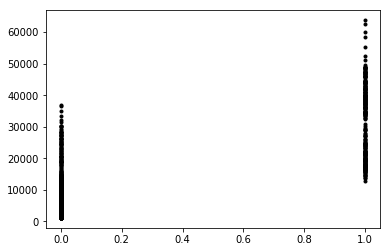

In [50]:
plt.plot(data['smoker'],data['charges'],'k.')

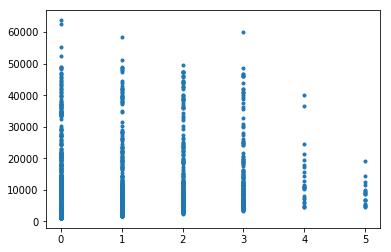

In [52]:
plt.plot(data['children'],data['charges'],'.')

In [37]:
le=preprocessing.LabelEncoder() #to convert smoker col to int

In [38]:
a=le.fit(data['smoker'])
a

LabelEncoder()

In [39]:
data['smoker']=le.transform(data['smoker'])

In [40]:
d=pd.get_dummies(data)
d.head(10)

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,1,0,0,0,0,1
1,18,33.770,1,0,1725.55230,0,1,0,0,1,0
2,28,33.000,3,0,4449.46200,0,1,0,0,1,0
3,33,22.705,0,0,21984.47061,0,1,0,1,0,0
4,32,28.880,0,0,3866.85520,0,1,0,1,0,0
5,31,25.740,0,0,3756.62160,1,0,0,0,1,0
6,46,33.440,1,0,8240.58960,1,0,0,0,1,0
7,37,27.740,3,0,7281.50560,1,0,0,1,0,0
8,37,29.830,2,0,6406.41070,0,1,1,0,0,0
9,60,25.840,0,0,28923.13692,1,0,0,1,0,0


In [41]:
correlation=d.corr('pearson')
abs(correlation['charges']).sort_values()

region_northeast    0.006349
region_northwest    0.039905
region_southwest    0.043210
sex_male            0.057292
sex_female          0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker              0.787251
charges             1.000000
Name: charges, dtype: float64

In [42]:
d=(d-d.min())/(d.max()-d.min())

In [43]:
#Using 4 features--> bmi,children,age,smoker,charges
x1= np.array(d['bmi'])
x2=np.array(d['children'])
x3=np.array(d['age'])
x4=np.array(d['smoker'])
y= np.array(d['charges'])

In [23]:
x1train,x1test,x2train,x2test,x3train,x3test,x4train,x4test,ytrain,ytest= train_test_split(x1,x2,x3,x4,y,test_size=0.2)

In [24]:
len(x1train)

1070

In [25]:
def hypothesis(a,x1,b,x2,c,x3,d,x4,e):
    return a * x1 +b * x2 + c * x3 + d * x4 +e  #hypothesis eq 

In [26]:
def error(a,x1,b,x2,c,x3,d,x4,e,y):
    err=0     #holds the error value
    m=len(x1)#how many data_pts r present
    
    for i in range(m):
        err += np.power((hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e)-y[i]),2) #err=summation(h-y)2
        
    return (1/(2*m)) *err #loss fn

In [27]:
def step_gradient(a,x1,b,x2,c,x3,d,x4,e,y,learning_rate):
    grad_a=0
    grad_b=0
    grad_c=0
    grad_d=0
    grad_e=0
    m= len(x1)
    
    for i in range(m):
        grad_a += (1/m) * (hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e)-y[i])*x1[i] #differentaition wrt a
        grad_b += (1/m) * (hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e)-y[i])*x2[i] #diff wrt b
        grad_c += (1/m) * (hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e)-y[i])*x3[i] #differentaition wrt c
        grad_d += (1/m) * (hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e)-y[i])*x4[i]#diff wrt d
        grad_e += (1/m) * (hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e)-y[i]) #differentaition wrt e
    
    
    a=a-grad_a*learning_rate
    b=b-grad_b*learning_rate
    c=c-grad_c*learning_rate
    d=d-grad_d*learning_rate
    e=e-grad_e*learning_rate

    return a,b,c,d,e

In [28]:
def descend(init_a,x1,init_b,x2,init_c,x3,init_d,x4,init_e,y,learning_rate,iteration):
    a=init_a
    b=init_b
    c=init_c
    d=init_d
    e=init_e

    
    for i in range(iterations): #iterations--> hw many times we step
        err=error(a,x1,b,x2,c,x3,d,x4,e,y)
        
        if i% 1000 == 0:
            print(f"Error: {np.sqrt(err)}, a: {a}, b:{b}, c:{c},d:{d},e:{e}") #print error at every 1000 step
            #sqrt of mean error
            
        a,b,c,d,e =step_gradient(a,x1,b,x2,c,x3,d,x4,e,y,learning_rate)
        
    return a,b,c,d,e

In [29]:
a=0.08035388438823748
b=0.023019811105856453
c=0.15036456190483258
d=0.35904360490071274
e=0.019139743644955295
learning_rate = 0.001
iterations = 10000

In [30]:
final_a, final_b,final_c,final_d,final_e = descend(a,x1train,b,x2train,c,x3train,d,x4train,e,ytrain,learning_rate,iterations)

Error: 0.06937679872254424, a: 0.08035388438823748, b:0.023019811105856453, c:0.15036456190483258,d:0.35904360490071274,e:0.019139743644955295
Error: 0.06917817056664442, a: 0.08202774419515982, b:0.023145311235658664, c:0.15161578315332208,d:0.3623547127255489,e:0.0156869480018146
Error: 0.06902049005547785, a: 0.08398226859607885, b:0.02343655432418009, c:0.15313268447650516,d:0.36533657240185485,e:0.013105578896137636
Error: 0.06888723846075741, a: 0.0859902900262321, b:0.02376643728019347, c:0.15464222952986215,d:0.3679355264318027,e:0.010827948359044352
Error: 0.0687728696432864, a: 0.08799771999404059, b:0.024104820932199296, c:0.15608388221382577,d:0.3701827243545731,e:0.008715865469217718
Error: 0.06867352363700634, a: 0.08999020073262531, b:0.02444380227388692, c:0.157445810331359,d:0.37212244138624645,e:0.006729793471078601
Error: 0.06858626689288752, a: 0.09196273138091807, b:0.024780696775143777, c:0.15872753797921013,d:0.37379665716190225,e:0.004853492516992595
Error: 0.06

In [112]:
final_a,final_b,final_c,final_d,final_e

(0.08233365028769875,
 0.02324135817527334,
 0.1530643490561815,
 0.36233603164221334,
 0.016187101700729234)

In [113]:
ytest[:3]

array([0.18784446, 0.1151298 , 0.06022293])

In [114]:
hypothesis(final_a,x1test[:3],final_b,x2test[:3],final_c,x3test[:3],final_d,x4test[:3],final_e)

array([0.06753211, 0.15272416, 0.09469732])

In [115]:
np.sqrt(error(final_a,x1test,final_b,x2test,final_c,x3test,final_d,x4test,final_e,ytest))#error for test values

0.0648276812792441